In [47]:
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from WindPy import w
%matplotlib inline

In [45]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [2]:
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=10.0.185.138;DATABASE=JYDB;UID=js_dev;PWD=js_dev')

In [182]:
stock = '603096'

In [183]:
query = 'SELECT t.SecuCode, t.SecuAbbr, s.SecuCode, s.SecuAbbr, fund.ReportDate, fund.SharesHolding \
        FROM MF_StockPortfolioDetail as fund, SecuMain as t, SecuMain as s \
        WHERE s.SecuCode = \'%s\' \
            AND fund.InnerCode = t.InnerCode \
            AND fund.StockInnerCode = s.InnerCode \
            ORDER BY fund.ReportDate DESC, fund.SharesHolding DESC'%(stock)

In [184]:
df = pd.read_sql_query(query, con=conn)

In [185]:
df = df.set_index('ReportDate')

In [186]:
df.head()

,SecuCode,SecuAbbr,SecuCode,SecuAbbr,SharesHolding
ReportDate,,,,,
2017-12-31,001044,嘉实新消费,603096,新 经 典,2374628.0
2017-12-31,161005,富国天惠A,603096,新 经 典,1503747.0
2017-12-31,519772,交银新生活力,603096,新 经 典,1286735.0
2017-12-31,519035,富国天博,603096,新 经 典,1107462.0
2017-12-31,004477,嘉实沪港深回报,603096,新 经 典,1075366.0


In [187]:
holding = df.groupby(df.index).sum().resample('6M').last()

In [188]:
holding

,SharesHolding
ReportDate,
2017-06-30,5369522.0
2017-12-31,19085373.0


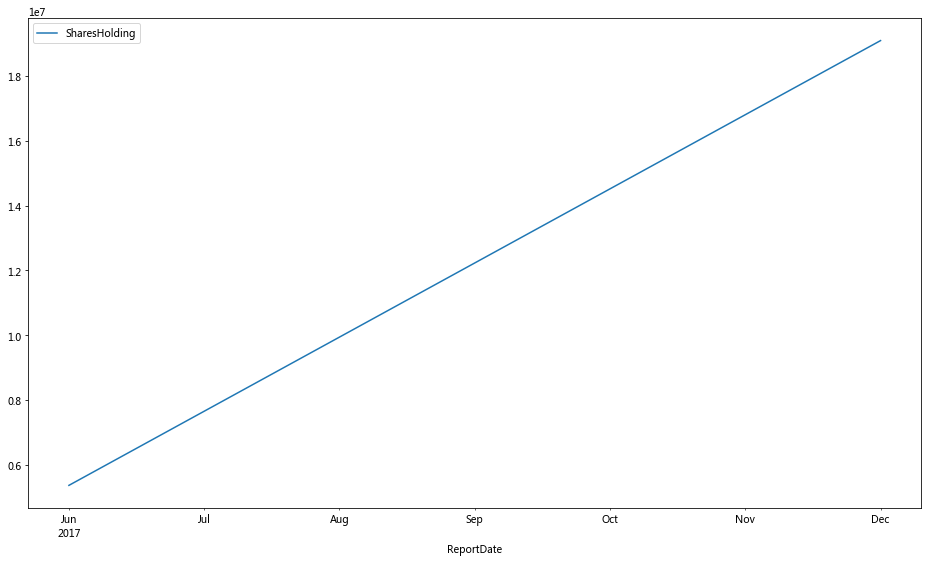

In [189]:
holding.plot(figsize=(16, 9))

In [190]:
start, end = holding.index[0].strftime('%Y-%m-%d'), holding.index[-1].strftime('%Y-%m-%d')
print '%s.SH'%(stock), start, end
data = w.wsd('%s.SH'%(stock), 'free_float_shares', start, end)

603096.SH 2017-06-30 2017-12-31


In [191]:
shares = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['shares'])

In [192]:
shares.index = pd.to_datetime(shares.index)

In [193]:
shares = shares.resample('6M').last()

In [197]:
shares

,shares
2017-06-30,33360000.0
2017-12-31,33360000.0


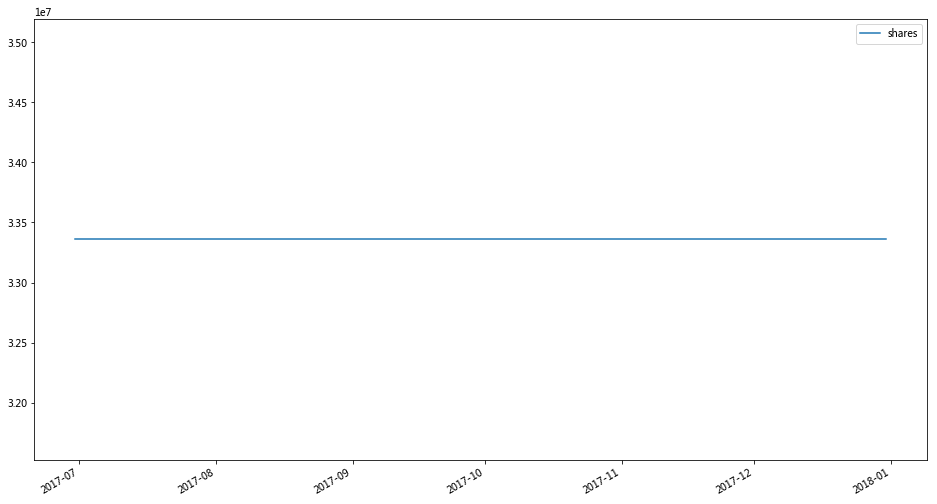

In [194]:
shares.plot(figsize=(16, 9))

In [195]:
pert = pd.DataFrame(holding.values / shares.values, index=holding.index, columns=['percent'])

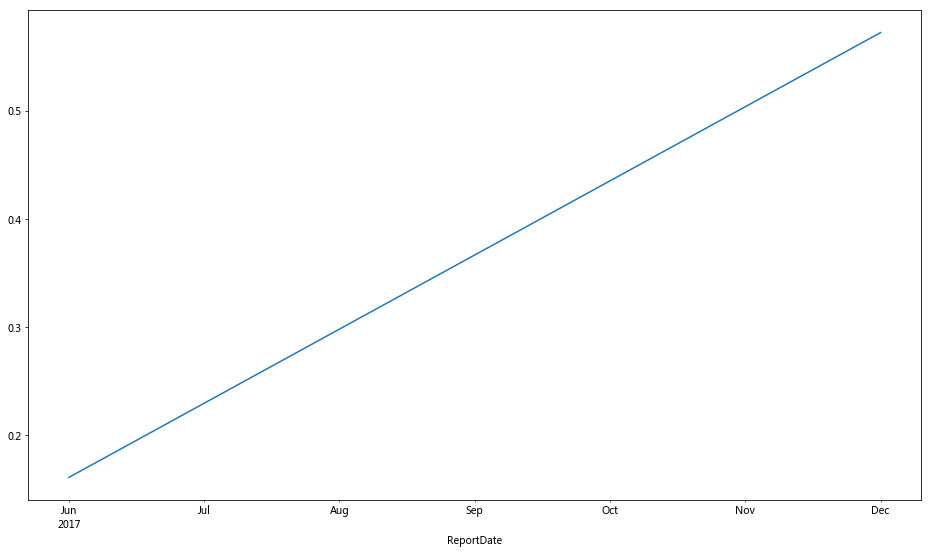

In [196]:
pert['percent'].plot(figsize=(16, 9))